

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Setup to display images - working, work to do

In [26]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## Get yesterday variable in bash and format it for url

In [2]:
yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'
yesterday = str(yesterday)[1:-1]
print(type(yesterday))
print(yesterday)

<class 'str'>
'2016-12-14'


### get url

In [4]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'

#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv' // graffiti
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'

#url = 'https://data.sfgov.org/resource/3434-6x5u.csv' //mattress
#url = 'https://data.sfgov.org/resource/3434-6x5u.csv' 
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
startdate = "'2016-12-01'"
startdate = yesterday
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-14'


## Set Display Column with wider so no problem with Media URL series

In [40]:
pd.options.display.max_colwidth=115

## create data frame

In [41]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

In [42]:
df = pd.read_csv(url)

In [43]:
df.shape

(75, 16)

#### wow, 5 days > 1000 reports

In [44]:
df


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6630013,12/15/2016 12:05:19 AM,NaN,12/15/2016 12:37:30 AM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"66 SHOTWELL ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767403608575, -122.416740179248)",Open311,NaN
1,6630003,12/14/2016 11:45:49 PM,NaN,12/15/2016 12:07:27 AM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"89 STILLMAN ST, SAN FRANCISCO, CA, 94107",6,South of Market,"(37.781967950177, -122.395936808136)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58524a1d3da19793c74d2bb3/report.jpg
2,6630001,12/14/2016 11:40:40 PM,NaN,12/15/2016 12:07:30 AM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1300 14TH AVE, SAN FRANCISCO, CA, 94122",5,Inner Sunset,"(37.763591535993, -122.471493795742)",Open311,NaN
3,6629952,12/14/2016 10:09:25 PM,NaN,12/14/2016 11:37:29 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 8TH ST and RINGOLD ST,6,South of Market,"(37.7745520439992, -122.409519485097)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585233873da19793c74d2b02/report.jpg
4,6629946,12/14/2016 09:55:28 PM,NaN,12/14/2016 10:22:45 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"32 SHOTWELL ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767880181091, -122.41677196966)",Open311,NaN
5,6629906,12/14/2016 09:14:40 PM,NaN,12/14/2016 10:08:53 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1660 GEARY BLVD, SAN FRANCISCO, CA, 94115",5,Japantown,"(37.784866805816, -122.430657340118)",Voice In,NaN
6,6629873,12/14/2016 08:44:50 PM,NaN,12/14/2016 08:47:26 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of GOUGH ST and MARKET ST,5,Lower Haight,"(37.7729089925437, -122.422186566302)",Voice In,NaN
7,6629858,12/14/2016 08:31:04 PM,NaN,12/14/2016 08:33:40 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of MAIN ST and MISSION ST,6,Financial District,"(37.7918419560989, -122.394940365855)",Voice In,NaN
8,6629773,12/14/2016 07:16:20 PM,NaN,12/14/2016 07:17:22 PM,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of JULIAN AVE and 14TH ST,9,Mission,"(37.7681993877703, -122.421209982613)",Voice In,NaN
9,6629657,12/14/2016 06:15:24 PM,NaN,12/14/2016 06:38:47 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"30 SHOTWELL ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767936465457, -122.416777363743)",Voice In,NaN


In [45]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [46]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6630013,2016-12-15 00:05:19,NaT,2016-12-15 00:37:30,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"66 SHOTWELL ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767403608575, -122.416740179248)",Open311,NaN
1,6630003,2016-12-14 23:45:49,NaT,2016-12-15 00:07:27,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"89 STILLMAN ST, SAN FRANCISCO, CA, 94107",6,South of Market,"(37.781967950177, -122.395936808136)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58524a1d3da19793c74d2bb3/report.jpg
2,6630001,2016-12-14 23:40:40,NaT,2016-12-15 00:07:30,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1300 14TH AVE, SAN FRANCISCO, CA, 94122",5,Inner Sunset,"(37.763591535993, -122.471493795742)",Open311,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=14.0, right=14.0
  'left=%s, right=%s') % (left, right))


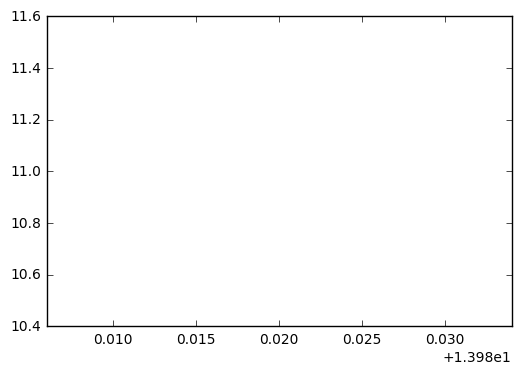

In [47]:
df.Closed.dt.day.value_counts().sort_index().plot()

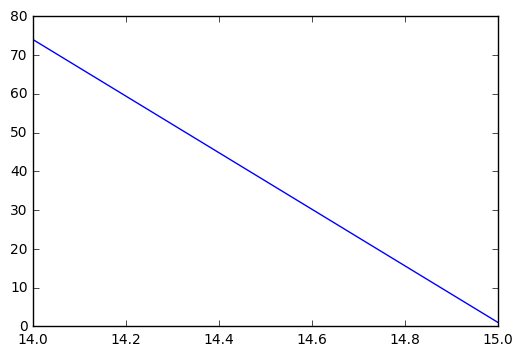

In [48]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


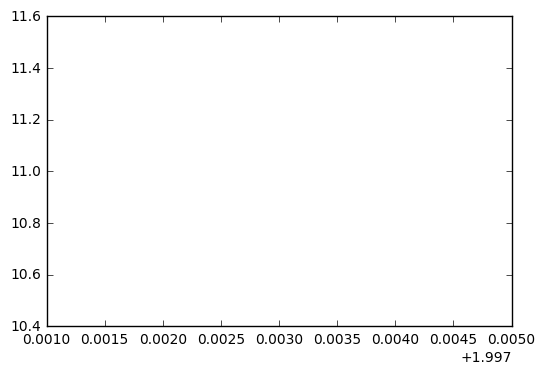

In [49]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [50]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [51]:

df['Request Details'].value_counts()


Encampment Cleanup    75
Name: Request Details, dtype: int64

In [52]:
df['Supervisor District'].value_counts().sort_index()



2      1
3      2
5      6
6     28
8      5
9     27
10     6
Name: Supervisor District, dtype: int64

In [53]:
df.Neighborhood.value_counts()

Mission               28
South of Market       11
Civic Center           5
Financial District     4
Mission Bay            4
Castro                 3
Showplace Square       3
Central Waterfront     2
South Beach            2
Mission Dolores        1
Produce Market         1
Bernal Heights         1
Hayes Valley           1
Inner Sunset           1
Japantown              1
Lower Nob Hill         1
Rincon Hill            1
Lower Haight           1
Cathedral Hill         1
Haight Ashbury         1
Name: Neighborhood, dtype: int64

In [54]:
#df[df.Neighborhood == 'Mission']
df = df[df.Neighborhood == 'Mission']


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [55]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [69]:

images = df[df['Media URL'].notnull() ]['CaseID']
images = images.reset_index(drop=True)

print(images[8])


6626691


In [33]:
len(images)

13

In [34]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5851fc3e3da19793c74d28dc/photo_20161214_181226.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5851d62f3da19793c74d23bd/report.jpg


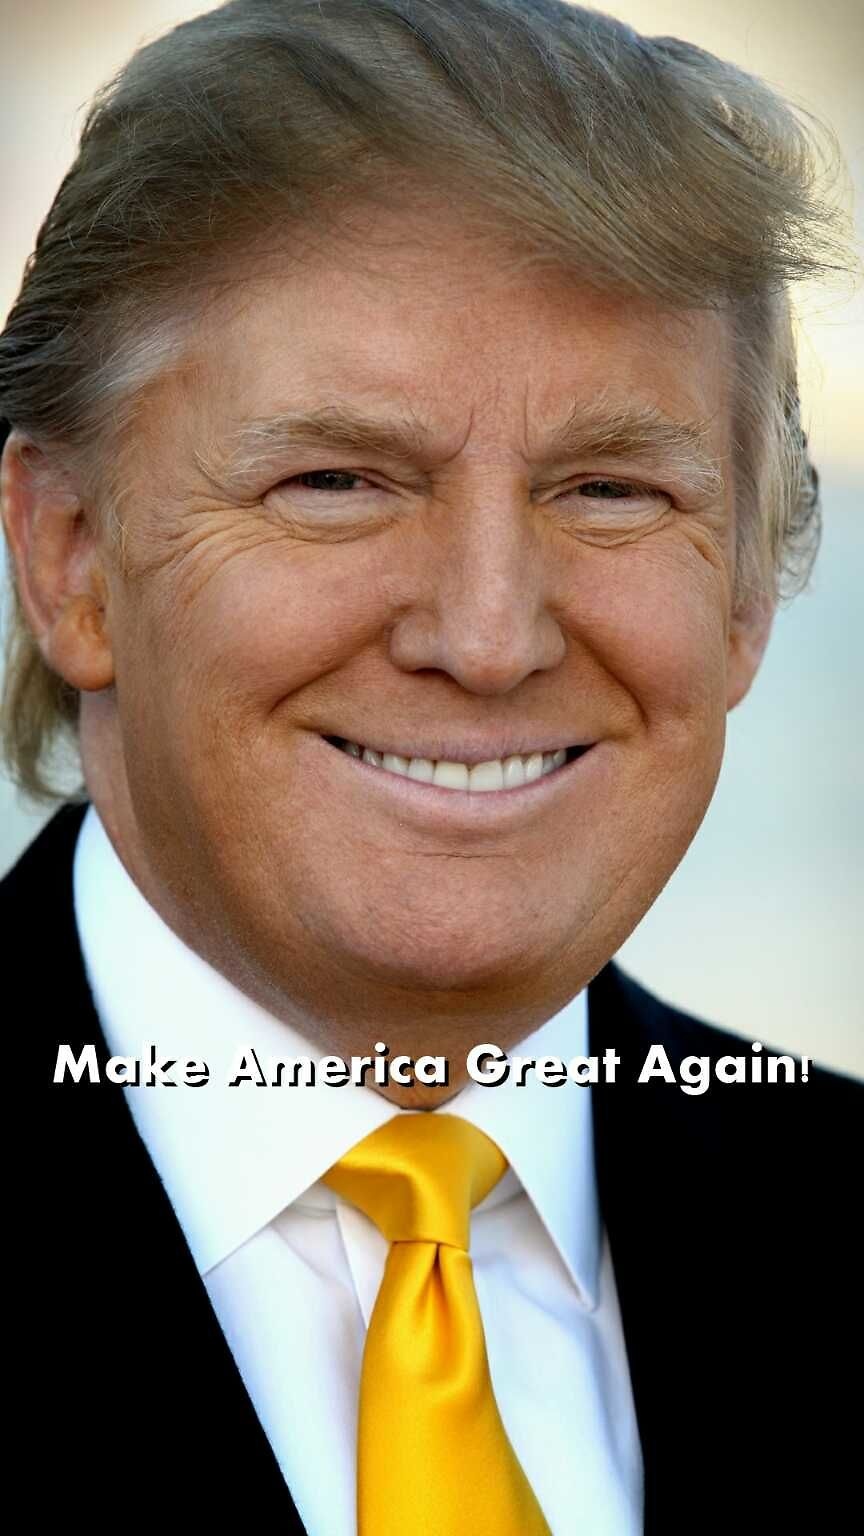

In [67]:
print(images[3])
Image(images[8])


In [36]:
!pwd

/home/gdillon/JupyterPractice/homeless_311


In [37]:
images[:180].to_csv("./imagelist.txt", index=False)

In [38]:
!yes| bash vidCreate.sh

--2016-12-15 19:22:59--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5851fc3e3da19793c74d28dc/photo_20161214_181226.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150999 (147K) [image/jpeg]
Saving to: 'photo_20161214_181226.jpg'

photo_20161214_1812 100%[===================>] 147.46K   761KB/s    in 0.2s    

2016-12-15 19:22:59 (761 KB/s) - 'photo_20161214_181226.jpg' saved [150999/150999]

--2016-12-15 19:22:59--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5851ec033da19793c74d271f/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 207300 (202K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 202.44K  --.-KB/s    in 0.04s   

2016-12-15 19:22:59 (4.98 MB/s) - 'report.jpg' saved

In [ ]:
'''
Had problems with this code, running standalone

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

In [ ]:
#!convert -delay 50 *.jpg out.mp4


In [ ]:
!ls


In [ ]:
Image('report2.jpg')